In [198]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [200]:
houses =  pd.read_csv('AmesHousing.txt', delimiter='\t')

In [201]:
train = houses.iloc[:1460]
test = houses.iloc[1460:]
target = 'SalePrice'

In [204]:
num_train = train.select_dtypes(include=['int', 'float'])

In [206]:
num_train.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [208]:
num_train.drop(columns=['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1, inplace=True)

In [210]:
num_train.head()

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,1,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,...,2.0,528.0,210,62,0,0,0,0,0,215000
1,2,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,...,1.0,730.0,140,0,0,0,120,0,0,105000
2,3,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,...,1.0,312.0,393,36,0,0,0,0,12500,172000
3,4,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,...,2.0,522.0,0,0,0,0,0,0,0,244000
4,5,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,...,2.0,482.0,212,34,0,0,0,0,0,189900


In [212]:
num_train.isna().sum()

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64

In [214]:
null_series = num_train.isnull().sum()
full_series = null_series[null_series == 0]

In [216]:
train_subset = train[full_series.index]

In [218]:
sale_price_corrs = train_subset.corr()['SalePrice']

In [220]:
sale_price_corrs = np.absolute(sale_price_corrs)

In [222]:
sorted_sale_corrs = sale_price_corrs.sort_values()

In [224]:
print(sorted_sale_corrs)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


In [226]:
strong_corrs = sorted_sale_corrs[sorted_sale_corrs > 0.3]

<Axes: >

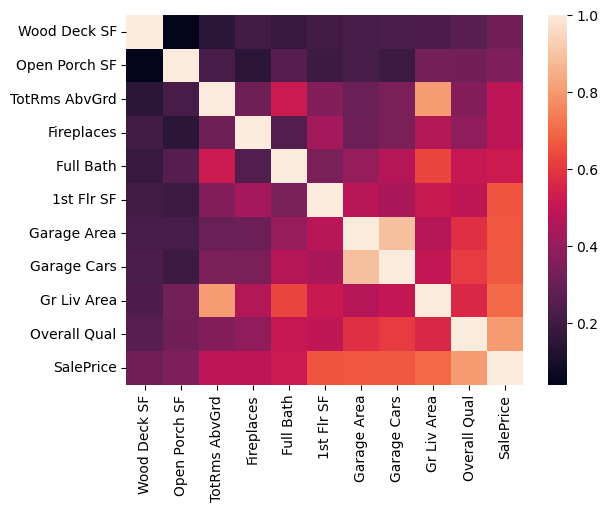

In [228]:
corrs_matrix = train_subset[strong_corrs.index].corr()

sns.heatmap(corrs_matrix)

In [230]:
final_corrs_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

<Axes: >

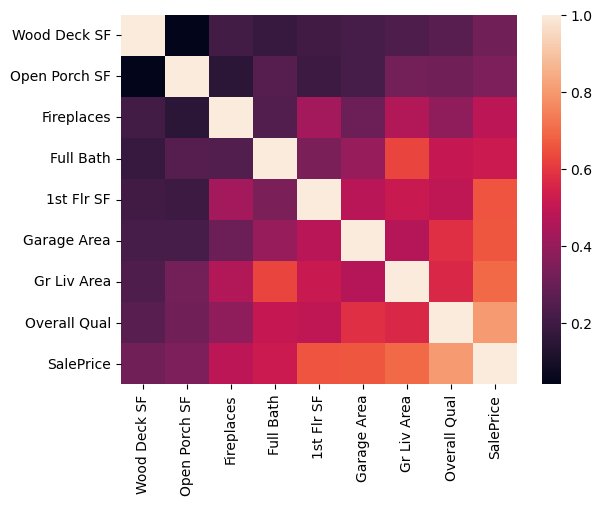

In [232]:
corrs_matrix = train_subset[final_corrs_cols.index].corr()

sns.heatmap(corrs_matrix)

In [234]:
test[final_corrs_cols.index].info()
test_subset = test[final_corrs_cols.index]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB


In [236]:
test_final_corrs_cols = final_corrs_cols.drop('Garage Area')
features = test_final_corrs_cols.drop(target).index

In [238]:
lr = LinearRegression()

In [240]:
lr.fit(train_subset[features], train_subset[[target]])

LinearRegression()

In [242]:
train_predictions = lr.predict(train_subset[features])
test_predictions = lr.predict(test_subset[features])

In [244]:
train_mse = mean_squared_error(train[target], train_predictions)
test_mse = mean_squared_error(test[target], test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [246]:
print(train_rmse, test_rmse)

35782.36767818103 41810.4331552842


In [248]:
normalised_train = train[features]

In [258]:
for column in normalised_train.columns:
    min_value = normalised_train[column].min()
    max_value = normalised_train[column].max()
    normalised_train[column] = (normalised_train[column] - min_value) / (max_value - min_value)

In [260]:
variance = normalised_train.var()

In [264]:
sorted_vars = variance.sort_values()

In [266]:
print(sorted_vars)

Open Porch SF    0.013938
Full Bath        0.018621
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


In [268]:
final_vars = sorted_vars[sorted_vars > 0.015]

In [284]:
final_features = final_vars.index
final_train_set = train[final_features]

In [286]:
lr2 = LinearRegression()
lr2.fit(final_train_set, train[[target]])

LinearRegression()

In [288]:
final_train_predictions = lr2.predict(final_train_set)
final_test_predictions = lr2.predict(test[final_features])

In [290]:
final_train_mse = mean_squared_error(train[target], final_train_predictions)
final_test_mse = mean_squared_error(test[target], final_test_predictions)
final_train_rmse = np.sqrt(final_train_mse)
final_test_rmse = np.sqrt(final_test_mse)

In [292]:
print(final_test_rmse, final_train_rmse)

41407.808154242186 35984.30198972422
